In [5]:
import pandas as pd
import numpy as np
from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned data
df = pd.read_csv("../data/clean/exoplanets_tableau_labeled.csv")


ModuleNotFoundError: No module named 'pandas'

In [ ]:
features = [
    'mass', 'radius', 'semi_major_axis', 'orbital_period',
    'eccentricity', 'star_teff', 'star_mass', 'star_radius', 'distance_pc'
]
target = 'habitability_label'

X = df[features]
y = df[target]


In [ ]:
# Handle missing values + scaling
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

preprocessor = ColumnTransformer([
    ("num", num_pipeline, features)
])


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [ ]:
model = Pipeline([
    ("pre", preprocessor),
    ("clf", RandomForestClassifier(
        n_estimators=200,
        class_weight="balanced",
        random_state=42
    ))
])

model.fit(X_train, y_train)


,steps,"[('pre', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


              precision    recall  f1-score   support

           0      0.989     0.996     0.993       543
           1      0.969     0.913     0.940        69

    accuracy                          0.987       612
   macro avg      0.979     0.955     0.966       612
weighted avg      0.987     0.987     0.987       612



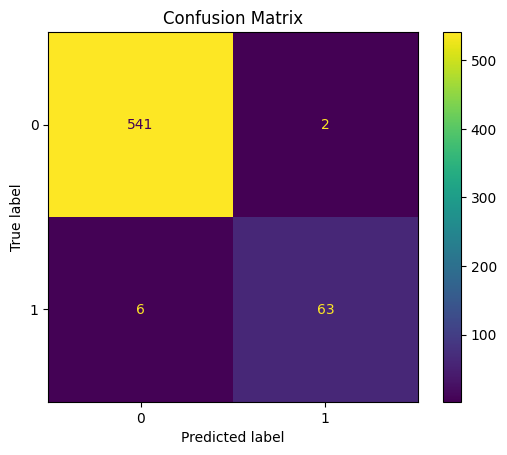

In [ ]:
y_pred = model.predict(X_test)

# Classification metrics
print(classification_report(y_test, y_pred, digits=3))

# Confusion matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.title("Confusion Matrix")
plt.show()


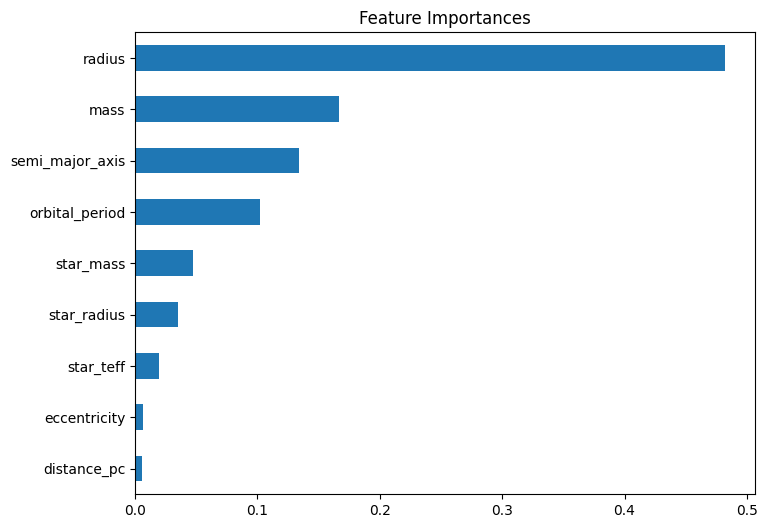

In [ ]:
clf = model.named_steps["clf"]
importances = clf.feature_importances_

# Visualize
feat_importance = pd.Series(importances, index=features).sort_values()
feat_importance.plot(kind="barh", figsize=(8,6))
plt.title("Feature Importances")
plt.show()


In [ ]:
# Predict on the full dataset (including training and test)
df_model = df.copy()

# Features you trained on
features = [
    'mass', 'radius', 'semi_major_axis', 'orbital_period',
    'eccentricity', 'star_teff', 'star_mass', 'star_radius', 'distance_pc'
]

# Use the same preprocessing pipeline
X_all = df_model[features]

# Predict class and probability
df_model["prediction"] = model.predict(X_all)
df_model["probability"] = model.predict_proba(X_all)[:, 1]
df_model.to_csv("../data/clean/exoplanets_with_predictions.csv", index=False)
print("✅ Saved predictions for Tableau!")


NameError: name 'df' is not defined